In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
zoo = pd.read_csv(r"D:\DS\13. KNN\Zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# EDA

In [3]:
zoo.shape


(101, 18)

In [4]:
zoo.rename(columns={'animal name':'animal_name'}, inplace=True)
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [6]:
# To split the observations into two part we find median
print("Mean is: ", zoo['type'].mean())
print("Median is: ", zoo['type'].median())

Mean is:  2.8316831683168315
Median is:  2.0


In [7]:
# We split the variables into two parts using median

type = []
for value in zoo['type']:
    if value<=2:
        type.append(0)
    else:
        type.append(1)
        
zoo['type'] = type

<AxesSubplot:>

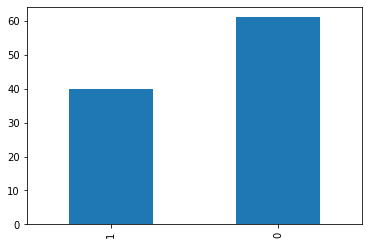

In [8]:
zoo.type.value_counts().sort_values().plot(kind='bar')

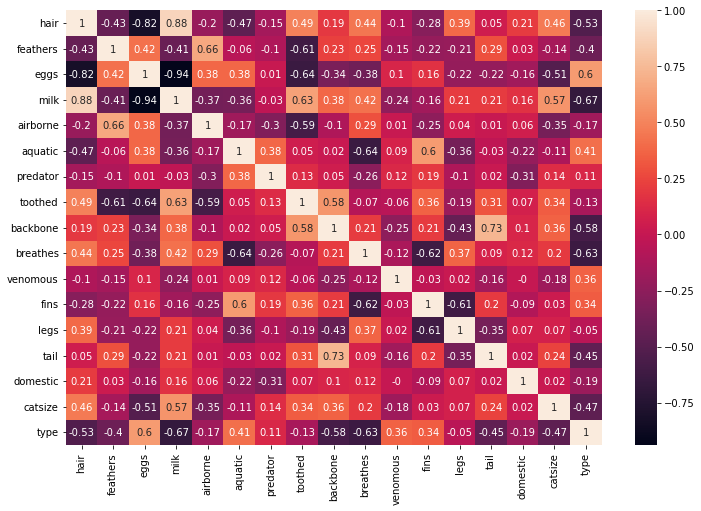

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(np.round(zoo.corr(),2), annot=True)
plt.show()


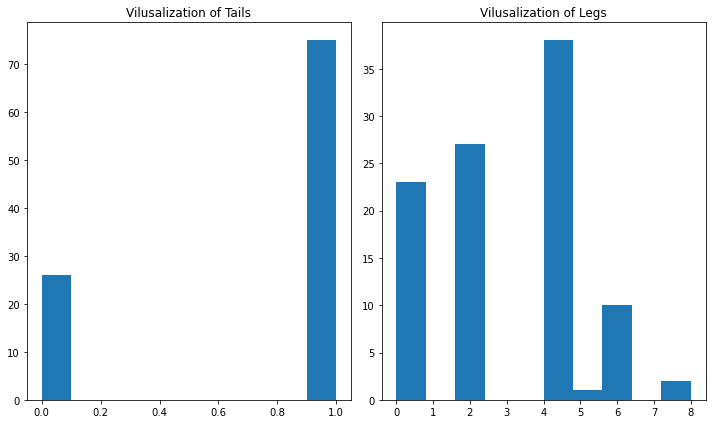

In [10]:
plt.figure(figsize=(10,6))

[plt.subplot(1,2,1), plt.hist('tail', data=zoo), plt.title('Vilusalization of Tails')],
[plt.subplot(1,2,2), plt.hist('legs', data=zoo), plt.title('Vilusalization of Legs')]
plt.tight_layout()
plt.show()

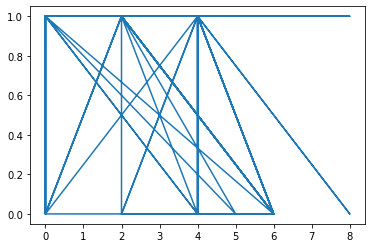

In [11]:
# Relationship between tail and legs

plt.plot('legs', 'tail', data=zoo) 
plt.show()

In [12]:
zoo.drop('animal_name', axis=1, inplace=True)

In [13]:
# spliting x and y

x= zoo.iloc[:,:-1]
y= zoo.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain, xtest,ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=1)


# KNN Classification


In [16]:
from sklearn.neighbors import KNeighborsClassifier


In [17]:
knn = KNeighborsClassifier()


In [18]:
def predict(model):
    model.fit(xtrain,ytrain)
    ypred =  model.predict(xtest)
    
    trainac= model.score(xtrain,ytrain)
    testac = model.score(xtest,ytest)
    
    print(f"Train AC {trainac}\nTest AC {testac}")

In [19]:
predict(KNeighborsClassifier())


Train AC 0.9733333333333334
Test AC 0.9615384615384616


# Hyperparameter Tuning


In [20]:
trainac = []
testac = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    
    trainac.append(knn.score(xtrain, ytrain))
    testac.append(knn.score(xtest, ytest))

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

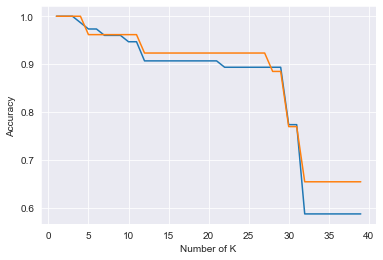

In [21]:
sns.set_style('darkgrid')

plt.plot(range(1,40), trainac)
plt.plot(range(1,40), testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid

In [22]:
predict(KNeighborsClassifier(n_neighbors=5))


Train AC 0.9733333333333334
Test AC 0.9615384615384616
